In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
data_dir = "dataN10kd10/"
#data001 = pd.read_csv(data_dir+"noise001.csv")
data005 = pd.read_csv(data_dir+"noise005.csv")
data010 = pd.read_csv(data_dir+"noise010.csv")
data025 = pd.read_csv(data_dir+"noise025.csv")
#data050 = pd.read_csv(data_dir+"noise050.csv")
#data100 = pd.read_csv(data_dir+"noise100.csv")

In [4]:
#data001['tau'] = -data001['delta_t']/np.log(data001['b_mean'])
data005['tau'] = -data005['delta_t']/np.log(data005['b_mean'])
data010['tau'] = -data010['delta_t']/np.log(data010['b_mean'])
data025['tau'] = -data025['delta_t']/np.log(data025['b_mean'])
#data050['tau'] = -data050['delta_t']/np.log(data050['b_mean'])
#data100['tau'] = -data100['delta_t']/np.log(data100['b_mean'])

In [5]:
#data001['tau_std'] = data001['delta_t']*data001['b_std']/np.log(data001['b_mean'])**2/data001['b_mean']
data005['tau_std'] = data005['delta_t']*data005['b_std']/np.log(data005['b_mean'])**2/data005['b_mean']
data010['tau_std'] = data010['delta_t']*data010['b_std']/np.log(data010['b_mean'])**2/data010['b_mean']
data025['tau_std'] = data025['delta_t']*data025['b_std']/np.log(data025['b_mean'])**2/data025['b_mean']
#data050['tau_std'] = data050['delta_t']*data050['b_std']/np.log(data050['b_mean'])**2/data050['b_mean']
#data100['tau_std'] = data100['delta_t']*data100['b_std']/np.log(data100['b_mean'])**2/data100['b_mean']


In [10]:
# averaging over all replicas
data005m = data005.groupby('delta_t').mean().reset_index()
data010m = data010.groupby('delta_t').mean().reset_index()
data025m = data025.groupby('delta_t').mean().reset_index()

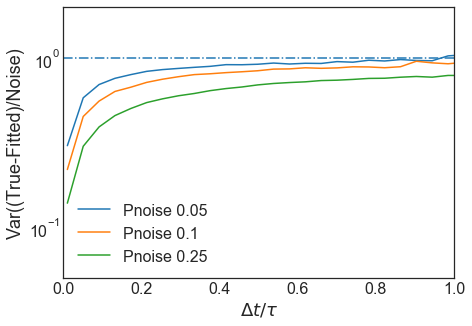

In [11]:
plt.figure(figsize=(7,5))
#plt.semilogy(data001['delta_t'],data001['stddiff']**2/0.01,label="Pnoise 0.01")
plt.semilogy(data005m['delta_t'],data005m['stddiff']**2/0.05,label="Pnoise 0.05")
plt.semilogy(data010m['delta_t'],data010m['stddiff']**2/0.1,label="Pnoise 0.1")
plt.semilogy(data025m['delta_t'],data025m['stddiff']**2/0.25,label="Pnoise 0.25")
#plt.semilogy(data050['delta_t'],data050['stddiff']**2/0.5,label="Pnoise 0.5")
#plt.semilogy(data100['delta_t'],data100['stddiff']**2,label="Pnoise 1.0")
#plt.axhline(y=0.01, linestyle='-.')
#plt.axhline(y=0.05, linestyle='-.')
#plt.axhline(y=0.1, linestyle='-.')
#plt.axhline(y=0.25, linestyle='-.')
#plt.axhline(y=0.5, linestyle='-.')
plt.axhline(y=1.0, linestyle='-.')
plt.xlim((0,1))
plt.ylim((0.05,2))
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'Var((True-Fitted)/Noise)')
plt.legend()
plt.savefig("True-Fitted_TimeSeries.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

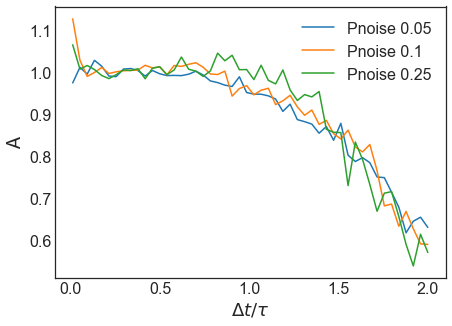

In [12]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['a_mean'],label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['a_mean'],label="Pnoise 0.05")
plt.plot(data010m['delta_t'],data010m['a_mean'],label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['a_mean'],label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['a_mean'],label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['a_mean'],label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel("A")
plt.legend()
plt.savefig("A.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

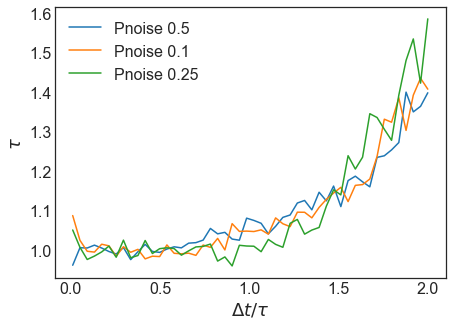

In [13]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['tau'],label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['tau'],label="Pnoise 0.5")
plt.plot(data010m['delta_t'],data010m['tau'],label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['tau'],label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['tau'],label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['tau'],label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'$\tau$')
plt.legend()
plt.savefig("tau.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

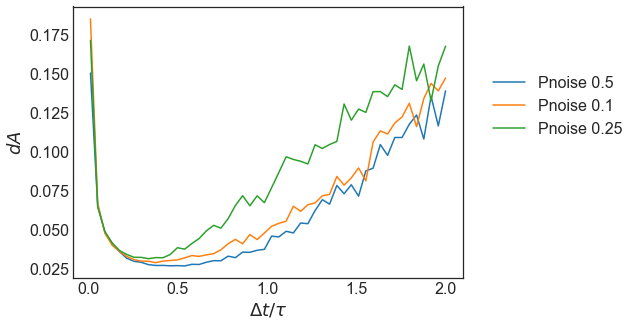

In [14]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['a_std'],label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['a_std'],label="Pnoise 0.5")
plt.plot(data010m['delta_t'],data010m['a_std'],label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['a_std'],label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['a_std'],label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['a_std'],label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'$dA$')
plt.legend(bbox_to_anchor=(1.04,0.8), loc="upper left")
plt.savefig("dA.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

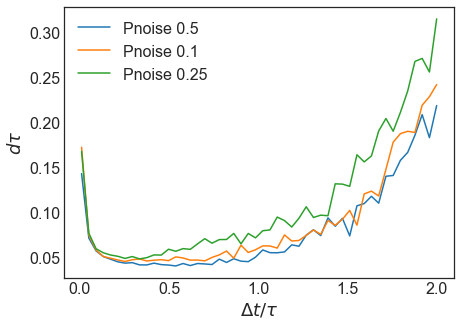

In [15]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['tau_std'],label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['tau_std'],label="Pnoise 0.5")
plt.plot(data010m['delta_t'],data010m['tau_std'],label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['tau_std'],label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['tau_std'],label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['tau_std'],label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'$d\tau$')
plt.legend()
plt.savefig("dtau.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

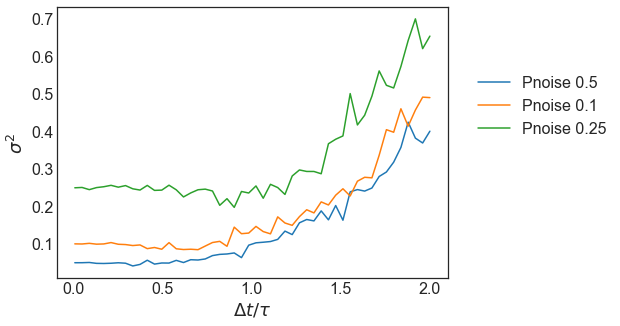

In [16]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['sigma_mean']**2,label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['sigma_mean']**2,label="Pnoise 0.5")
plt.plot(data010m['delta_t'],data010m['sigma_mean']**2,label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['sigma_mean']**2,label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['sigma_mean']**2,label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['sigma_mean']**2,label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'$\sigma^{2}$')
plt.legend(bbox_to_anchor=(1.04,0.8), loc="upper left")
plt.savefig("simgasq.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

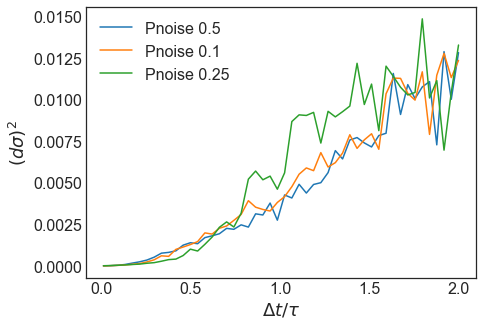

In [20]:
plt.figure(figsize=(7,5))
#plt.plot(data001['delta_t'],data001['sigma_std']**2,label="Pnoise 0.01")
plt.plot(data005m['delta_t'],data005m['sigma_std']**2,label="Pnoise 0.5")
plt.plot(data010m['delta_t'],data010m['sigma_std']**2,label="Pnoise 0.1")
plt.plot(data025m['delta_t'],data025m['sigma_std']**2,label="Pnoise 0.25")
#plt.plot(data050['delta_t'],data050['sigma_std']**2,label="Pnoise 0.5")
#plt.plot(data100['delta_t'],data100['sigma_std']**2,label="Pnoise 1.0")
plt.xlabel(r'$\Delta t/\tau$')
plt.ylabel(r'$(d\sigma)^{2}$')
plt.legend()
plt.savefig("dsimgasq.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")